# **Studi Hepatitis C 5 Fitur**

Implementasi dengan menggunakan `Naive Bayes` , `K-NN` , `K-Means Clustering` dan `Decision Tree`

## Membaca Data

In [51]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/maulanamaib/streamlit_wine/master/HepatitisCdata.csv')
data.fillna(0,inplace=True)
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [52]:
# data.nlargest(2,"CREA")

### Class

In [53]:
data['Sex'] = pd.Categorical(data["Sex"])
data["Sex"] = data["Sex"].cat.codes
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,0,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [54]:
data['Category'] = pd.Categorical(data["Category"])
data["Category"] = data["Category"].cat.codes
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,0,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [55]:
fd = data.drop(data.columns[8:14],axis=1)
# fd.drop(X_test.columns[2:4],axis=1)
dt = fd.drop(data.columns[4:6],axis=1)
coba = dt.drop(data.columns[0:1],axis=1)

y = coba['Category'].values
dada = coba.drop(data.columns[1],axis=1)
dada
len(y)

615

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(dada, y, test_size=0.2, random_state=1)
X_train.shape + X_test.shape

(492, 4, 123, 4)

In [57]:
X_test

,Age,Sex,ALT,AST
475,53,0,23.0,22.1
473,53,0,20.9,42.4
111,42,1,30.3,22.5
318,32,0,22.0,29.8
13,33,1,15.9,24.0
...,...,...,...,...
305,66,1,20.3,27.3
201,50,1,46.4,32.3
197,50,1,55.9,24.3
567,48,1,19.3,69.1


In [58]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/datamining/tugas/model/datafix2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dada.to_csv(filepath) 

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(y)
# y = le.transform(y)
# y

In [61]:
y_class = data['Category']
y = y_class.values.tolist()
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:
y_class

0      0
1      0
2      0
3      0
4      0
      ..
610    4
611    4
612    4
613    4
614    4
Name: Category, Length: 615, dtype: int8

### Drop Target / Class

In [63]:
col = ['Unnamed: 0','Category']

In [64]:
X = data.drop(columns=col)
X


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Preprocessing Min-Max

Normalisasi data menggunakan `Min - Max`

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(dada)
nama_fitur = dada.columns.copy()
scaled_fitur = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur

,Age,Sex,ALT,AST
0,0.224138,1.0,0.023670,0.036694
1,0.224138,1.0,0.055334,0.044990
2,0.224138,1.0,0.111282,0.134014
3,0.224138,1.0,0.094067,0.038290
4,0.224138,1.0,0.100215,0.045310
...,...,...,...,...
610,0.741379,0.0,0.018137,0.318124
611,0.775862,0.0,0.008915,0.107849
612,0.775862,0.0,0.010759,0.282068
613,0.465517,0.0,0.119889,0.164008


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_fitur, y, test_size=0.2, random_state=1)
X_train.shape + X_test.shape

(492, 4, 123, 4)

### Save Normalisasi

In [67]:
# fd = X_test.drop(X_test.columns[6:13],axis=1)
# fd.drop(X_test.columns[2:4],axis=1)
# coba = fd.drop(X_test.columns[2:4],axis=1)
# coba

In [68]:
X_test

,Age,Sex,ALT,AST
475,0.586207,0.0,0.070704,0.036694
473,0.586207,0.0,0.064248,0.101468
111,0.396552,1.0,0.093145,0.037971
318,0.224138,0.0,0.067630,0.061264
13,0.241379,1.0,0.048878,0.042757
...,...,...,...,...
305,0.810345,1.0,0.062404,0.053287
201,0.534483,1.0,0.142638,0.069241
197,0.534483,1.0,0.171841,0.043714
567,0.500000,1.0,0.059330,0.186662


In [69]:
# from pathlib import Path  
# filepath = Path('/content/drive/MyDrive/datamining/tugas/model/datafix2.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# coba.to_csv(filepath) 

In [70]:
import joblib
filename = '/content/drive/MyDrive/datamining/tugas/model/caca.sav'
joblib.dump(scaler, filename) 

['/content/drive/MyDrive/datamining/tugas/model/caca.sav']

In [71]:
# filenameCsv = '/content/drive/MyDrive/datamining/tugas/model/data2.csv'
# joblib.dump(X , filenameCsv)


In [72]:
# from pathlib import Path  
# filepath = Path('/content/drive/MyDrive/datamining/tugas/model/data3.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# X.to_csv(filepath) 

In [73]:
# filenameCsv = '/content/drive/MyDrive/datamining/tugas/model/data2.csv'
# joblib.dump(X , filenameCsv)


In [74]:
# filenameCsv = '/content/drive/MyDrive/datamining/tugas/model/data2.csv'
# joblib.dump(X , filenameCsv)


### Split Data

In [75]:
# from google.colab import drive
# drive.mount('/content/drive')

split data **20%**

In [76]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/datamining/tugas/model/datatestfix.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath) 

## Inisialisasi Model `Naive Bayes` (gaussian)

### Eksekusi pada Model

In [77]:
# import pandas as pd
# X_train.info()

In [78]:
# X_train.isnull().any()

In [79]:
# X_train.isna().sum()

In [80]:
# a = data.drop(columns='Category')
# a


In [81]:
# # Langkah 1
# rata_2 = X_train['ALP'].mean()
# # Langkah 2
# X_train['ALP'] = X_train['ALP'].fillna(rata_2)
# # Langkah 
# X_train['ALP'].isna().sum()

In [82]:
# # Langkah 1
# rata_2 = X_train['ALT'].mean()
# # Langkah 2
# X_train['ALT'] = X_train['ALT'].fillna(rata_2)
# # Langkah 
# X_train['ALT'].isna().sum()

In [83]:
# # Langkah 1
# rata_2 = X_train['ALB'].mean()
# # Langkah 2
# X_train['ALB'] = X_train['ALB'].fillna(rata_2)
# # Langkah 
# X_train['ALB'].isna().sum()

In [84]:
# np.isnan(X.values.any())


In [85]:
# X_test.fillna(X_train.mean(), inplace=True)
 

In [86]:
# X_train.isna().any()

In [87]:
# data.isnull().sum()

In [88]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas = clf.predict_proba(X_test)[:,1]
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 4])

In [89]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# from sklearn import metrics
# #Try running from k=1 through 30 and record testing accuracy
# k_range = range(1,31)
# scores = {}
# scores_list = []
# for k in k_range:
#         # install model
#         knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(X_train,y_train)
      
#         # filenameKNN = '/content/drive/MyDrive/datamining/tugas/model/knnmodel'+str(k)+'.pkl'
#         joblib.dump(knn,filenameKNN)
#         y_pred=knn.predict(X_test)
#         scores[k] = accuracy_score(y_test,y_pred)
#         scores_list.append(accuracy_score(y_test,y_pred))
# scores

In [90]:
X_test

,Age,Sex,ALT,AST
475,0.586207,0.0,0.070704,0.036694
473,0.586207,0.0,0.064248,0.101468
111,0.396552,1.0,0.093145,0.037971
318,0.224138,0.0,0.067630,0.061264
13,0.241379,1.0,0.048878,0.042757
...,...,...,...,...
305,0.810345,1.0,0.062404,0.053287
201,0.534483,1.0,0.142638,0.069241
197,0.534483,1.0,0.171841,0.043714
567,0.500000,1.0,0.059330,0.186662


In [91]:
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
      print(y_pred[i])

0
3
4
3
2
0
4
0
0
4
0
2


In [92]:
print (X_train,y_train)

          Age  Sex       ALT       AST
241  0.603448  1.0  0.159238  0.080089
245  0.620690  1.0  0.031356  0.011168
607  0.568966  0.0  0.003996  0.063178
242  0.620690  1.0  0.080848  0.048819
200  0.534483  1.0  0.134952  0.080408
..        ...  ...       ...       ...
129  0.431034  1.0  0.052874  0.064135
144  0.448276  1.0  0.185367  0.071155
72   0.327586  1.0  0.050108  0.038928
235  0.586207  1.0  0.131571  0.059987
37   0.275862  1.0  0.074085  0.065093

[492 rows x 4 columns] [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Save Model `Naive bayes`

In [93]:
# import joblib
# filenameNB = '/content/drive/MyDrive/datamining/tugas/model/modelNB.pkl'
# joblib.dump(clf,filenameNB)

In [94]:
X_train

,Age,Sex,ALT,AST
241,0.603448,1.0,0.159238,0.080089
245,0.620690,1.0,0.031356,0.011168
607,0.568966,0.0,0.003996,0.063178
242,0.620690,1.0,0.080848,0.048819
200,0.534483,1.0,0.134952,0.080408
...,...,...,...,...
129,0.431034,1.0,0.052874,0.064135
144,0.448276,1.0,0.185367,0.071155
72,0.327586,1.0,0.050108,0.038928
235,0.586207,1.0,0.131571,0.059987


### Menghitung Probas

In [95]:
probas

array([3.82181404e-05, 1.34072315e-04, 1.63793800e-04, 6.18531200e-06,
       8.65839776e-05, 9.36654545e-04, 6.44897051e-06, 1.28269047e-04,
       4.01413976e-05, 2.72176734e-04, 4.08009023e-03, 1.59947749e-04,
       1.13067275e-05, 2.50582181e-05, 4.37228614e-05, 1.21410095e-04,
       7.29218991e-06, 9.30629252e-05, 1.99017981e-03, 6.59255659e-04,
       4.61028840e-05, 1.56667953e-01, 1.54497430e-04, 1.37603155e-03,
       1.42748497e-01, 8.88439997e-05, 5.19378135e-03, 1.05070803e-01,
       1.34210784e-04, 1.48369950e-03, 2.54219390e-04, 4.87604779e-05,
       3.52200783e-04, 8.99426266e-04, 1.24727511e-04, 6.47434734e-04,
       1.53600661e-01, 4.72300927e-04, 3.39217170e-03, 1.23250935e-04,
       2.26351279e-03, 2.00027986e-05, 7.75249036e-04, 2.10946844e-04,
       6.86410658e-05, 2.45025642e-05, 1.21232209e-05, 3.01202254e-05,
       2.37712700e-03, 1.96886298e-05, 3.89084618e-04, 1.33073046e-04,
       3.20322504e-05, 3.61043283e-04, 5.77811217e-02, 1.06021148e-04,
      

""

In [96]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
precision = round(precision_score(y_test,y_pred, average="macro")*100,2)
acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc_nb))

Konfusi Matrix
 [[100   0   2   0]
 [  5   1   0   2]
 [  0   2   3   1]
 [  0   0   0   7]]
precision: 64.64
recall: 65.13
fscore: 62.92
accuracy: 90.24


### Predict Input To Naive Bayes Model

In [97]:
list_input = []
list_input.append('6 1 32 43'.split())
# list_input.append('50 0 120 289'.split())
# list_input.append('70 1 130 322'.split())
# list_input.append('67 0 115 564'.split())
list_input

[['6', '1', '32', '43']]

input to Model Normalisasi 

In [98]:
X_test

,Age,Sex,ALT,AST
475,0.586207,0.0,0.070704,0.036694
473,0.586207,0.0,0.064248,0.101468
111,0.396552,1.0,0.093145,0.037971
318,0.224138,0.0,0.067630,0.061264
13,0.241379,1.0,0.048878,0.042757
...,...,...,...,...
305,0.810345,1.0,0.062404,0.053287
201,0.534483,1.0,0.142638,0.069241
197,0.534483,1.0,0.171841,0.043714
567,0.500000,1.0,0.059330,0.186662


In [99]:
from sklearn.preprocessing import StandardScaler
norm = joblib.load(filename)
pred_input = norm.fit_transform(list_input)
pred_input=pd.DataFrame(pred_input,columns=nama_fitur)
pred_input


,Age,Sex,ALT,AST
0,0.0,0.0,0.0,0.0


Input to Model Naive Bayes

In [100]:
# nb = joblib.load(filenameNB)
# input_pred = nb.predict(pred_input)
# input_pred

## Inisialisasi Model `KNN`

### Eksekusi Pada model

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,31)
scores = {}
scores_list = []
for k in k_range:
        # install model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        filenameKNN = '/content/drive/MyDrive/datamining/tugas/model/KNNmodel'+str(k)+'.pkl'
        joblib.dump(knn,filenameKNN)
        y_pred=knn.predict(X_test)
        scores[k] = accuracy_score(y_test,y_pred)
        scores_list.append(accuracy_score(y_test,y_pred))
scores

{1: 0.8536585365853658,
 2: 0.8455284552845529,
 3: 0.8536585365853658,
 4: 0.8699186991869918,
 5: 0.8617886178861789,
 6: 0.8617886178861789,
 7: 0.8617886178861789,
 8: 0.8536585365853658,
 9: 0.8455284552845529,
 10: 0.8455284552845529,
 11: 0.8455284552845529,
 12: 0.8455284552845529,
 13: 0.8455284552845529,
 14: 0.8455284552845529,
 15: 0.8455284552845529,
 16: 0.8455284552845529,
 17: 0.8455284552845529,
 18: 0.8455284552845529,
 19: 0.8455284552845529,
 20: 0.8455284552845529,
 21: 0.8455284552845529,
 22: 0.8455284552845529,
 23: 0.8455284552845529,
 24: 0.8455284552845529,
 25: 0.8455284552845529,
 26: 0.8455284552845529,
 27: 0.8373983739837398,
 28: 0.8373983739837398,
 29: 0.8373983739837398,
 30: 0.8373983739837398}

In [102]:
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4])

### Visualisasi Score

Text(0, 0.5, 'Testing Accuracy')

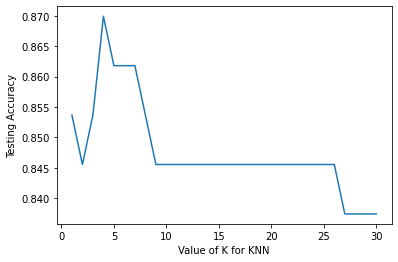

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

nilai k dengan akurasi tertinggi

In [104]:
scores_list.index(max(scores_list))+1 , max(scores_list)

(4, 0.8699186991869918)

In [105]:
knn = KNeighborsClassifier(n_neighbors=scores_list.index(max(scores_list))+1)
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred_knn)
precision = round(precision_score(y_test,y_pred_knn, average="macro")*100,2)
acc = round(accuracy_score(y_test,y_pred_knn)*100,2)
recall = round(recall_score(y_test,y_pred_knn, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred_knn, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc))

Konfusi Matrix
 [[102   0   0   0]
 [  5   1   1   1]
 [  4   1   0   1]
 [  2   0   1   4]]
precision: 51.73
recall: 42.41
fscore: 44.11
accuracy: 86.99


### Implementasi Pada data Input

Menggunakan KNN dengan nilai K = `11`

In [106]:
knn5 = joblib.load('/content/drive/MyDrive/datamining/tugas/model/KNNmodel5.pkl')
knn_pred = knn5.predict(pred_input)
knn_pred

array([0])

## Inisialisasi K-Means Clustering

### Eksekusi Pada Model

In [107]:
from sklearn.cluster import KMeans

# #Try running from n=1 through 30 and record testing accuracy
n_range = range(1,31)
akurasi = {}
akurasi_score = []
for k in n_range:
        # install model
        kmeans = KMeans(n_clusters=k,random_state=0)
        kmeans.fit(X_train,y_train)
        # save model
        filenameKMeans = '/content/drive/MyDrive/datamining/tugas/model/modelKMeans'+str(k)+'.pkl'
        joblib.dump(kmeans,filenameKMeans)
        y_pred=kmeans.predict(X_test)
        akurasi[k] = accuracy_score(y_test,y_pred)
        akurasi_score.append(accuracy_score(y_test,y_pred))
akurasi_score


[0.8292682926829268,
 0.3333333333333333,
 0.3252032520325203,
 0.1951219512195122,
 0.1951219512195122,
 0.17073170731707318,
 0.1951219512195122,
 0.22764227642276422,
 0.25203252032520324,
 0.0975609756097561,
 0.08130081300813008,
 0.0975609756097561,
 0.08943089430894309,
 0.04065040650406504,
 0.08943089430894309,
 0.10569105691056911,
 0.0975609756097561,
 0.12195121951219512,
 0.08130081300813008,
 0.016260162601626018,
 0.08943089430894309,
 0.0975609756097561,
 0.07317073170731707,
 0.024390243902439025,
 0.08130081300813008,
 0.07317073170731707,
 0.08130081300813008,
 0.032520325203252036,
 0.04065040650406504,
 0.07317073170731707]

### Visualisasi Hasil K-means

Text(0, 0.5, 'Testing Accuracy')

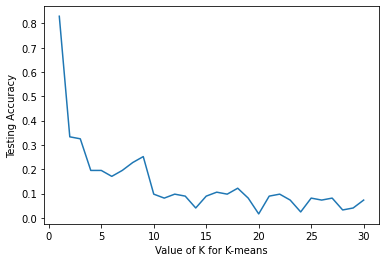

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(n_range,akurasi_score)
plt.xlabel('Value of K for K-means')
plt.ylabel('Testing Accuracy')

Nilai n dengan akurasi tertinggi

In [109]:
akurasi_score.index(max(akurasi_score)) , max(akurasi_score)

(0, 0.8292682926829268)

## Inisialisasi Decision Tree

### Eksekusi Pada Model

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =5, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Decision Tree Rules Text

In [111]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(dtc,
                        feature_names = list(nama_fitur))
#print the result
print(tree_rules)

|--- AST <= 0.14
|   |--- ALT <= 0.03
|   |   |--- AST <= 0.05
|   |   |   |--- AST <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- AST >  0.01
|   |   |   |   |--- ALT <= 0.01
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- ALT >  0.01
|   |   |   |   |   |--- class: 0
|   |   |--- AST >  0.05
|   |   |   |--- ALT <= 0.02
|   |   |   |   |--- ALT <= 0.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- ALT >  0.00
|   |   |   |   |   |--- class: 4
|   |   |   |--- ALT >  0.02
|   |   |   |   |--- Age <= 0.59
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Age >  0.59
|   |   |   |   |   |--- class: 3
|   |--- ALT >  0.03
|   |   |--- Age <= 0.21
|   |   |   |--- class: 2
|   |   |--- Age >  0.21
|   |   |   |--- AST <= 0.09
|   |   |   |   |--- ALT <= 0.12
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ALT >  0.12
|   |   |   |   |   |--- class: 0
|   |   |   |--- AST >  0.09
|   |   |   |   |--- Age <= 0.78
|   |   |   |   |   |--- class: 0
|   |   

### Rules Decision Tree Plot Diagram

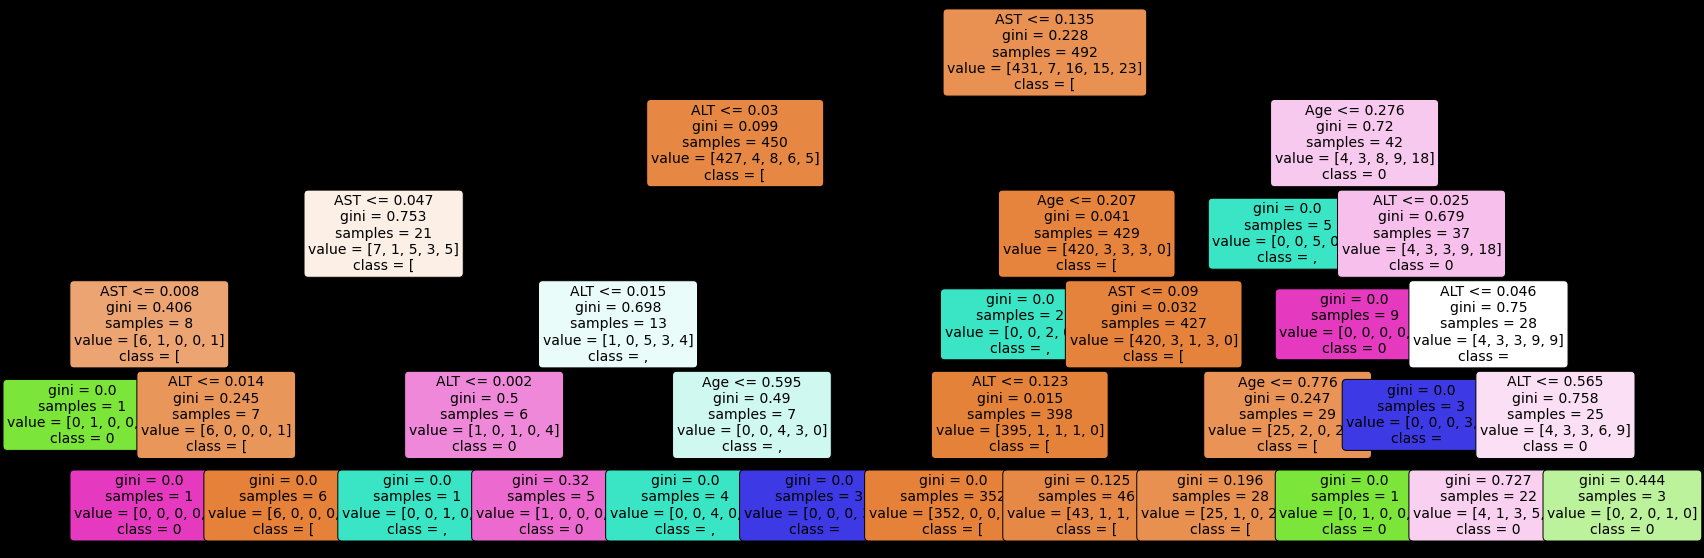

In [112]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(dtc,feature_names = nama_fitur,class_names = str(y),rounded = True,filled = True,fontsize=14)
#show the plot
plt.show()


### Hasil

In [113]:
Sdtc_pred = dtc.predict(X_test)
Sdtc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0,
       0, 0, 0, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 3])

In [114]:
cm_dtc = confusion_matrix(y_test,Sdtc_pred)
precision_dtc = round(precision_score(y_test,Sdtc_pred, average="macro")*100,2)
acc_dtc = round(accuracy_score(y_test,Sdtc_pred)*100,2)
recall_dtc = round(recall_score(y_test,Sdtc_pred, average="macro")*100,2)
f1score_dtc = round(f1_score(y_test, Sdtc_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm_dtc)
print('precision: {}'.format(precision_dtc))
print('recall: {}'.format(recall_dtc))
print('fscore: {}'.format(f1score_dtc))
print('accuracy: {}'.format(acc_dtc))

Konfusi Matrix
 [[101   1   0   0]
 [  3   1   1   3]
 [  0   1   0   5]
 [  0   0   1   6]]
precision: 43.33
recall: 49.31
fscore: 43.35
accuracy: 87.8
